<a href="https://colab.research.google.com/github/FukuokaIruka/Ex3/blob/main/jikken3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実験３: 自然言語処理（１）単語の分散表現（Word Embedding）

## 自然言語処理
自然言語処理（Natural Language Processing）とは、人間が日常的に使う言語（＝自然言語）をコンピュータに理解・処理・生成させる技術のことです。

私たちが普段使っている「言葉」は、非常に曖昧で、複雑で、文脈に依存します。 NLPは、こうした言語の特徴を数値的・統計的に捉え、以下のようなタスクを実現することを目指します：

NLPの主な応用例：

テキスト分類（スパム判定、感情分析など）
質問応答システム（例：ChatGPT）
機械翻訳（翻訳アプリ、DeepL など）
文章の自動要約
音声認識・音声対話（Siri, Alexa）
検索エンジン・推薦システム
この演習では、NLPの基礎である単語の意味を数値ベクトルで表す技術（word embedding）を学び、コンピュータが「言葉の意味的な違い・共通点」をどのように理解しようとしているのかを体験します。

## One-Hotベクトル

自然言語処理を行う上で、最初に思いつく単語の表現方法は、
**one-hot vector（ワンホットベクトル）**です。

語彙（vocabulary）に ```10,000語``` があったとしたら、各単語を ```10,000次元``` のベクトルで表現します：

* 「apple」 → [0, 0, 0, ..., 1, 0, 0]（1つだけ1で、あとはすべて0）
* 「orange」 → [0, 0, 1, ..., 0, 0, 0]

このように、各単語は完全に独立した記号として扱われます。

### One-hotの限界：意味的な関係が分からない
One-hotベクトルには、以下のような限界があります：
* 単語同士の意味的な距離がまったく分からない
* どの単語も同じだけ離れている（内積は常に0）

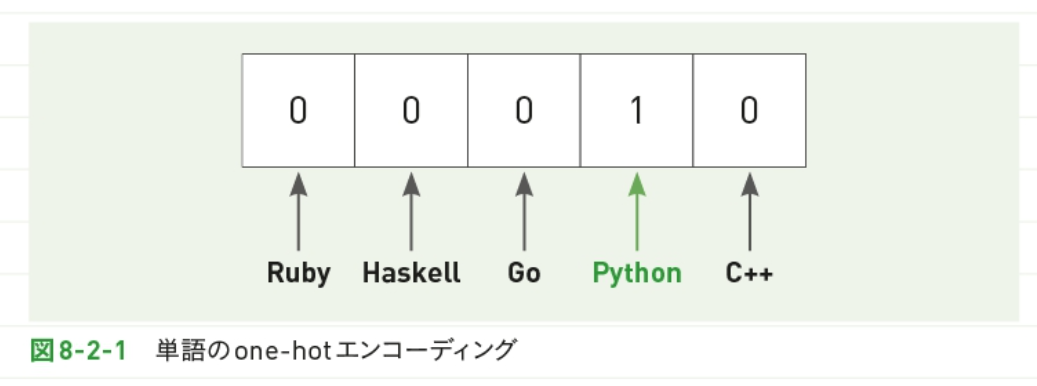

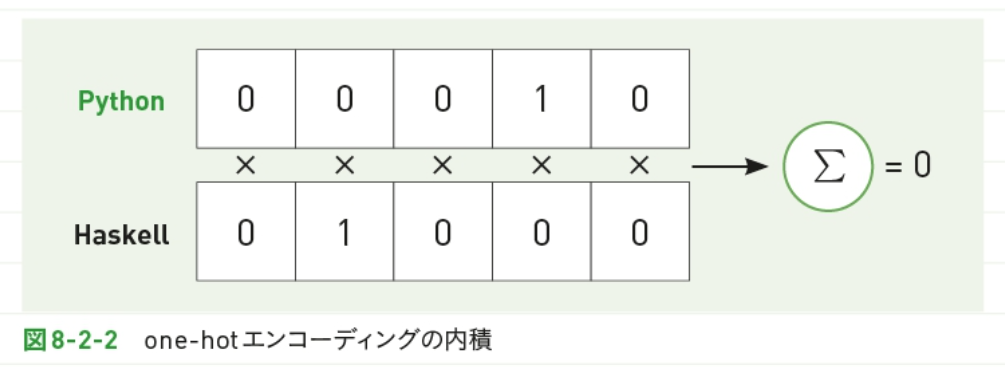

**近い単語も、遠い単語も「全部ゼロ」**という状態になってしまいます。

もうひとつの欠点は、新しい単語を追加するたびに、ベクトルの次元が一つ増えます。そしたら、前に学習させたモデルがトレーニングし直さなければなりません。

## 単語をベクトルで表す：Word Embeddings（単語の分散表現）
私たち人間は、「単語の意味」をなんとなく知覚しています。
たとえば：

* 「王様」と「女王」は似ている
* 「ゆず」と「みかん」は柑橘系として同じカテゴリ
* 「王様」から「男性」の要素を引いて「女性」を加えると「女王」になりそう…

こうした意味的な関係性を、数値ベクトルの距離や方向として捉えられるのが、**word embedding（単語の分散表現）**です。

### 単語をベクトルで表現するとは？
単語を「意味の空間」に配置して、1つ1つを数百次元のベクトルで表現します。

* king = [0.5, -0.2, 0.8, ...]
* queen = [0.4, -0.1, 0.9, ...]

このとき、意味が近い単語は近いベクトルになります。
ベクトルの間の**コサイン類似度（cosine similarity）**を使って、「どれだけ似ているか」を測定できます。

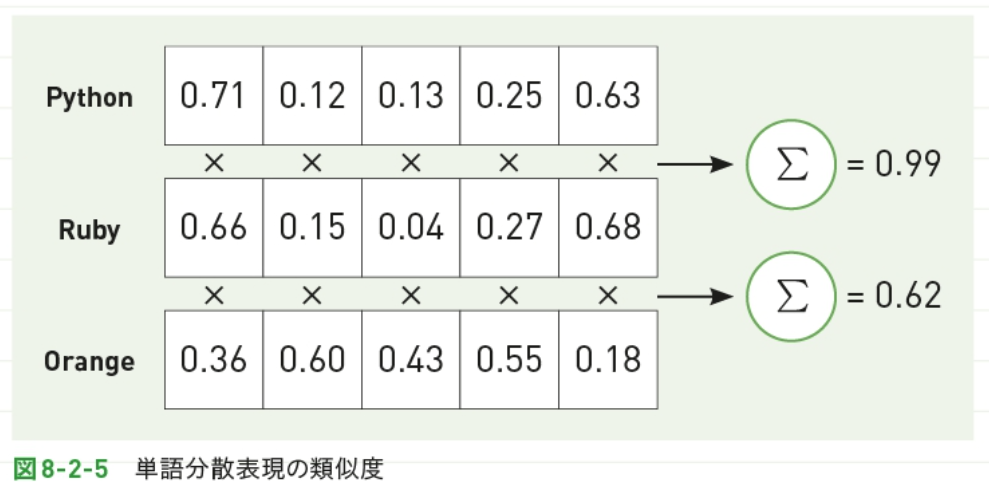

### どのようにして学習するのか？
Word2Vec や GloVe などの手法は、**「単語の周囲にどんな単語が出てくるか」という情報を使ってベクトルを学習します。
つまり、「文脈が似ている単語」＝「意味が似ている単語」**という仮定のもとに作られています。

たとえば：
* 「王様は玉座に座った」
* 「女王は宮殿に入った」

このような文脈情報を統計的に集めて、単語ベクトルを構築します。

単語ベクトルの応用
* 意味の近い単語の検索（類語辞典のように使える）
* 文の類似度計算
* 文書分類、機械翻訳、質問応答、感情分析など、さまざまな NLP タスクの基盤として活用されます
* ベクトルを PCA や t-SNE で可視化することで、語彙全体の意味構造を見ることもできます

## Skip-gramモデル
Skip-gramモデルは、ある単語を見て、その周りにある単語を予測するというアイデアに基づいた手法です。

たとえば、次のような文を考えてみましょう：

* 「私は 昨日 美味しい ラーメン を 食べた。」

ここで、「美味しい」を中心にした場合、**前後の単語（＝文脈単語）**は次のようになります：

* ウィンドウサイズ = 2 のとき
→ 入力：美味しい → 出力（ターゲット）：昨日, ラーメン

### ウィンドウという考え方
Skip-gramでは、1つの単語を中心にして、**前後数語（＝ウィンドウ）**の単語を見ます。
このときの関係性は：

* 中心の単語 = 入力（context word）
* 周囲の単語 = 予測対象（target words）

このようなペアを大量に集めて、「この単語があったら、その周囲にはどんな単語が来やすいか？」という共起のパターンを学習します。

### 何を学んでいるのか？
最終的にモデルは、単語を意味的に似ているものほど近い位置に配置するようにベクトルを調整していきます。

* 「王様」と「女王」は似た文脈で使われやすい
* 「ゆず」と「みかん」も同じように柑橘系として現れる文脈が近い

これらが学習されることで、意味を反映した単語ベクトルが得られます。



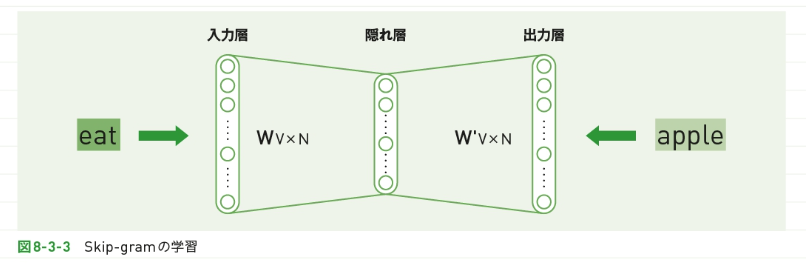

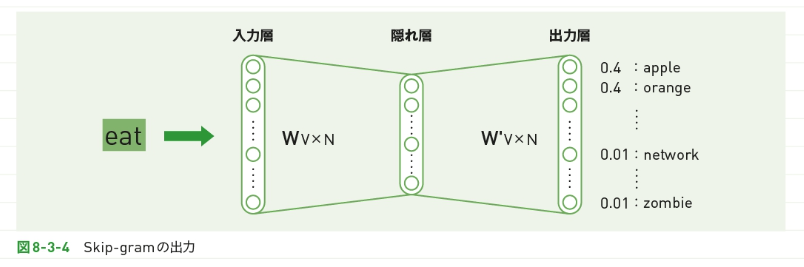

In [ ]:
negative_samples = 1
num_words = 10000
window_size = 1
emb_dim = 50

In [ ]:
!pip install --upgrade gensim

In [ ]:
import sys
from packaging import version

IS_COLAB = "google.colab" in sys.modules
if IS_COLAB:
    import os
    os.environ["TF_USE_LEGACY_KERAS"] = "1"
    import tf_keras

import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [ ]:
from pprint import pprint

import numpy as np
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

# from tf.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
# from tf.keras.preprocessing.text import Tokenizer
# from tf.keras.preprocessing.sequence import skipgrams, make_sampling_table
# from tf.keras.layers import Input, Dot, Flatten, Embedding, Dense
# from tf.keras.models import Model, load_model

In [ ]:
!mkdir data
!wget https://s3-ap-northeast-1.amazonaws.com/dev.tech-sketch.jp/chakki/public/ja.text8.zip -P data/
!unzip data/ja.text8.zip -d data/

In [ ]:
def load_data(filepath, encoding='utf-8'):
    with open(filepath, encoding=encoding) as f:
        return f.read()


text = load_data(filepath='data/ja.text8')

In [ ]:
def build_vocabulary(text, num_words=None):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words, oov_token='<UNK>')
    tokenizer.fit_on_texts([text])
    return tokenizer


def create_dataset(text, vocab, num_words, window_size, negative_samples):
    data = vocab.texts_to_sequences([text]).pop()
    sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(num_words)
    couples, labels = tf.keras.preprocessing.sequence.skipgrams(data, num_words,
                                window_size=window_size,
                                negative_samples=negative_samples,
                                sampling_table=sampling_table)
    word_target, word_context = zip(*couples)
    word_target = np.reshape(word_target, (-1, 1))
    word_context = np.reshape(word_context, (-1, 1))
    labels = np.asarray(labels)
    return [word_target, word_context], labels


vocab = build_vocabulary(text, num_words)
x, y = create_dataset(text, vocab, num_words, window_size, negative_samples)

In [ ]:
class EmbeddingModel:

    def __init__(self, vocab_size, emb_dim=100):
        self.word_input = tf.keras.layers.Input(shape=(1,), name='word_input')
        self.word_embed = tf.keras.layers.Embedding(input_dim=vocab_size,
                                    output_dim=emb_dim,
                                    input_length=1,
                                    name='word_embedding')

        self.context_input = tf.keras.layers.Input(shape=(1,), name='context_input')
        self.context_embed = tf.keras.layers.Embedding(input_dim=vocab_size,
                                       output_dim=emb_dim,
                                       input_length=1,
                                       name='context_embedding')

        self.dot = tf.keras.layers.Dot(axes=2)
        self.flatten = tf.keras.layers.Flatten()
        self.output = tf.keras.layers.Dense(1, activation='sigmoid')

    def build(self):
        word_embed = self.word_embed(self.word_input)
        context_embed = self.context_embed(self.context_input)
        dot = self.dot([word_embed, context_embed])
        flatten = self.flatten(dot)
        output = self.output(flatten)
        model = tf.keras.models.Model(inputs=[self.word_input, self.context_input],
                      outputs=output)
        return model


model = EmbeddingModel(num_words, emb_dim)
model = model.build()

In [ ]:
model.summary()

In [ ]:
epochs = 100
batch_size = 128
save_path = '/tmp/model'
log_dir = 'logs'

model.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

history = model.fit(
    x, y,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
               tf.keras.callbacks.ModelCheckpoint(
                   filepath=save_path,
                   monitor='val_loss',
                   save_best_only=True,
                   mode='min'
               ),
               tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    ]
)

In [ ]:
model = tf.keras.models.load_model("/content/data")

In [ ]:
class InferenceAPI:
    """A model API that generates output sequence.

    Attributes:
        model: Model.
        vocab: vocabulary.
    """

    def __init__(self, model, vocab):
        self.vocab = vocab
        self.weights = model.get_layer('word_embedding').get_weights()[0]

    def most_similar(self, word, topn=10):
        word_index = self.vocab.word_index.get(word, 1)
        sim = self._cosine_similarity(word_index)
        pairs = [(s, i) for i, s in enumerate(sim)]
        pairs.sort(reverse=True)
        pairs = pairs[1: topn + 1]
        res = [(self.vocab.index_word[i], s) for s, i in pairs]
        return res

    def similarity(self, word1, word2):
        word_index1 = self.vocab.word_index.get(word1, 1)
        word_index2 = self.vocab.word_index.get(word2, 1)
        weight1 = self.weights[word_index1]
        weight2 = self.weights[word_index2]
        return cosine(weight1, weight2)

    def _cosine_similarity(self, target_idx):
        target_weight = self.weights[target_idx]
        similarity = cosine_similarity(self.weights, [target_weight])
        return similarity.flatten()

In [ ]:
api = InferenceAPI(model, vocab)
api.most_similar(word='日本')

In [ ]:
# 未知語
api.most_similar(word='hogefuga')

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

In [ ]:
!pip uninstall -y numpy gensim
!pip install --upgrade numpy gensim

In [ ]:
import logging
import gensim
# from gensim.models.word2vec import Word2Vec, Text8Corpus

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = Text8Corpus('data/ja.text8')
model = Word2Vec(sentences, vector_size=100, window=5, sg=1)